In [67]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from matplotlib import pyplot as plt

In [4]:
import sys
import imp
import pandas as pd

In [5]:
import os
l = os.listdir('../data/tickdict2_24/')

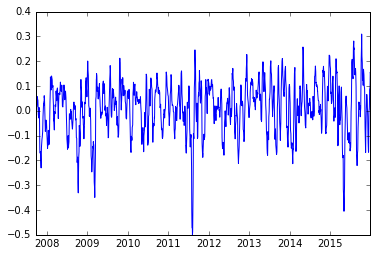

In [66]:
plt.plot(data.kal_vel[100:])

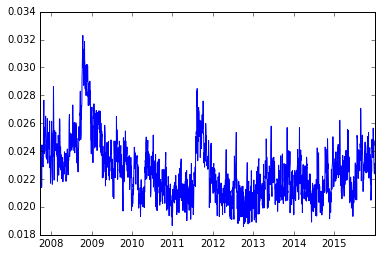

In [64]:
plt.plot(data.kal_velcov[100:])

In [62]:
def crude_curve(data):
    data['kal_pred'] = data.kal_mean+data.kal_vel*3
    data['kal_res'] = data.kal_pred - data.Close
    data['pos'] = data.kal_res
    data['rol_std'] = pd.rolling_std(data.kal_res, 100)
    crude = (abs(data.kal_res) > (data.rol_std* data.kal_velcov*80)  )*sign(data.kal_res)*data.dailyrets
    plt.plot(np.cumprod(crude+1))
    return crude

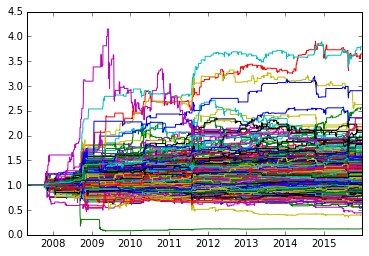

1.0801523007
0.489123036839


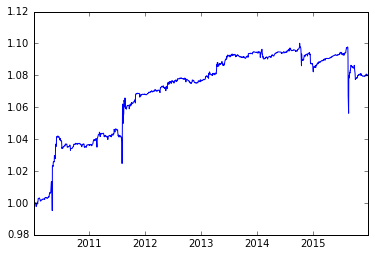

In [63]:
# thresh: data.rol_std* data.kal_velcov*60, pred: data.kal_mean+data.kal_vel*5
port = pd.DataFrame()
for symbol in l:
    data = pd.read_pickle(''.join(('../data/tickdict2_24/', symbol)))
    crude = crude_curve(data)
    port[symbol] = crude
plt.show()
ser = port.sum(axis = 1)
plot(np.cumprod(ser['2010':]/len(l)+1))
ret = np.prod(ser['2010':]/len(l)+1)
print(ret)
#sharpe
print((ret**(1/6)-1)/(np.std(ser['2010':]/len(l))*16))

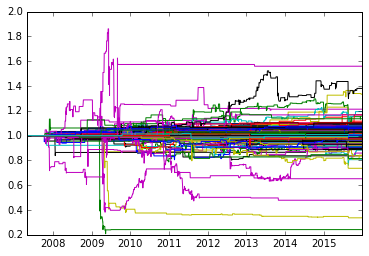

0.998046180036
-0.148867904277


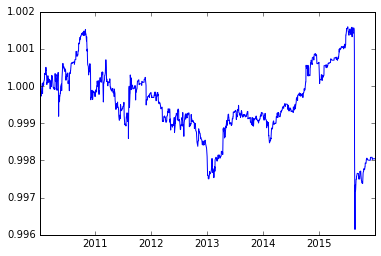

In [57]:
# thresh: data.rol_std* data.kal_pricecov*4
port = pd.DataFrame()
for symbol in l:
    data = pd.read_pickle(''.join(('../data/tickdict2_24/', symbol)))
    crude = crude_curve(data)
    port[symbol] = crude
plt.show()
ser = port.sum(axis = 1)
plot(np.cumprod(ser['2010':]/len(l)+1))
ret = np.prod(ser['2010':]/len(l)+1)
print(ret)
#sharpe
print((ret**(1/6)-1)/(np.std(ser['2010':]/len(l))*16))

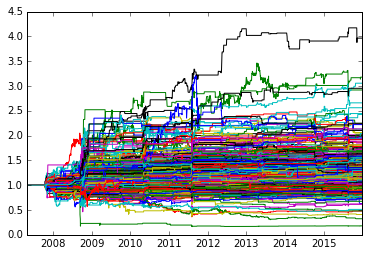

In [7]:
port = pd.DataFrame()
for symbol in l:
    data = pd.read_pickle(''.join(('../data/tickdict2_24/', symbol)))
    crude = crude_curve(data)
    port[symbol] = crude
    

1.082953913561111

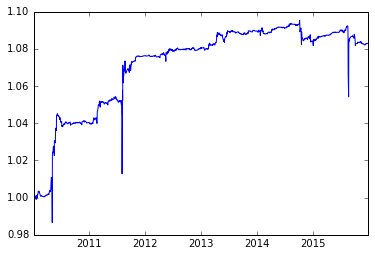

In [8]:
ser = port.sum(axis = 1)
plot(np.cumprod(ser['2010':]/len(l)+1))
ret = np.prod(ser['2010':]/len(l)+1)
ret


In [9]:
#sharpe
(ret**(1/6)-1)/(np.std(ser['2010':]/len(l))*16)

0.39396151971003002

In [10]:
#vol
(np.std(ser['2010':]/len(l))*16)

0.03393901843482118

In [64]:
data = pd.read_pickle('../data/tickdict2_24/RHI')

In [93]:
data.head()

,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume,kal_mean,kal_vel,kal_pricecov,kal_velcov,smooth,trend,resid,dailyrets,kal_pred,kal_res,pos
Date,,,,,,,,,,,,,,,,,,,
2007-05-02,13.281444,13.281444,2007-05-02,100.539998,99.47,99.649998,AAPL,126286300,200.000000,0.000000,10.000875,5.003500,NaN,NaN,NaN,0.000100,200.000000,186.718556,186.718556
2007-05-03,13.282767,13.282767,2007-05-03,101.449999,100.009999,100.730002,AAPL,144019400,-30.730437,-76.923603,6.469820,2.946398,NaN,NaN,NaN,0.004084,-107.654040,-120.936807,-120.936807
2007-05-04,13.337008,13.337008,2007-05-04,101.600002,100.499997,100.799997,AAPL,95496800,-59.186353,-58.911850,5.731502,1.384051,NaN,NaN,NaN,0.030850,-118.098203,-131.435211,-131.435211
2007-05-07,13.748457,13.748457,2007-05-07,104.349998,101.010002,101.079997,AAPL,215389300,-42.274984,-35.495763,3.568516,0.560697,NaN,NaN,NaN,0.010970,-77.770747,-91.519204,-91.519204
2007-05-08,13.899277,13.899277,2007-05-08,105.149997,103.419997,103.469998,AAPL,195999300,-51.324955,-28.557253,4.384971,0.406997,NaN,NaN,NaN,0.017323,-79.882209,-93.781486,-93.781486


In [94]:
data['kal_pred'] = data.kal_mean+data.kal_vel

In [95]:
data['kal_res'] = data.kal_pred - data.Close

In [96]:
data['pos'] = data.kal_res

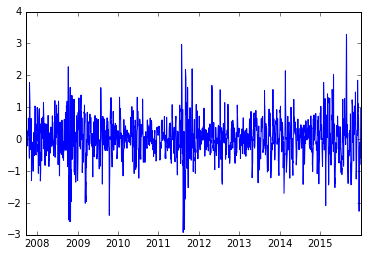

In [143]:
plot(data.kal_res[100:])

In [145]:
np.std(data.kal_res[100:])

0.6149552338502398

In [110]:
crude = (abs(data.kal_res) - data.kal_pricecov*0 - data.kal_velcov*0 > 5)*sign(data.kal_res)*data.dailyrets

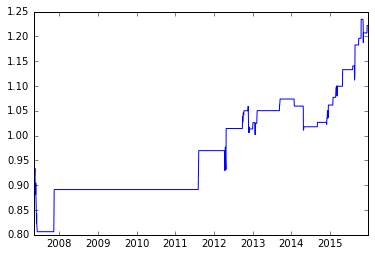

In [111]:
plot(np.cumprod(crude+1))

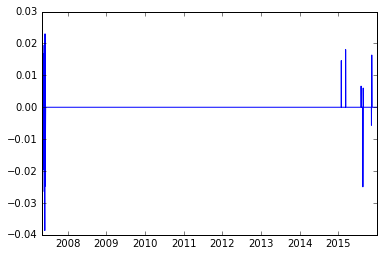

In [71]:
plot((abs(data.kal_res) - data.kal_pricecov - data.kal_velcov*10 > 5)*sign(data.kal_res)*data.dailyrets )

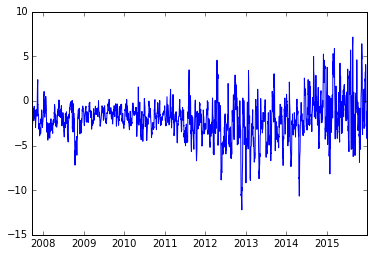

In [75]:
plot(data.kal_res[100:]-data.kal_pricecov)

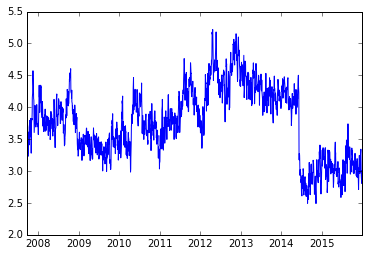

In [82]:
plot(data.kal_velcov[100:]*100)

In [10]:
import filterpy as fp
from filterpy.kalman import predict, update

In [171]:
from filterpy.common import Q_discrete_white_noise
Q = Q_discrete_white_noise(dim=2, dt=1., var=.0035)
Q

array([[ 0.000875,  0.00175 ],
       [ 0.00175 ,  0.0035  ]])

In [121]:
from filterpy.kalman import KalmanFilter
pricefilter = KalmanFilter(dim_x=2, dim_z=1)

In [122]:
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

def pos_vel_filter(x, P, R, Q=0., dt=1.0):
    """ Returns a KalmanFilter which implements a
    constant velocity model for a state [x dx].T
    """
    
    kf = KalmanFilter(dim_x=2, dim_z=1)
    kf.x = np.array([x[0], x[1]]) # location and velocity
    kf.F = np.array([[1, dt],
                     [0,  1]])    # state transition matrix
    kf.H = np.array([[1, 0]])     # Measurement function
    kf.R *= R                   # measurement uncertainty
    if np.isscalar(P):
        kf.P *= P                 # covariance matrix 
    else:
        kf.P[:] = P
    if np.isscalar(Q):
        kf.Q = Q_discrete_white_noise(dim=2, dt=dt, var=Q)
    else:
        kf.Q = Q
    return kf



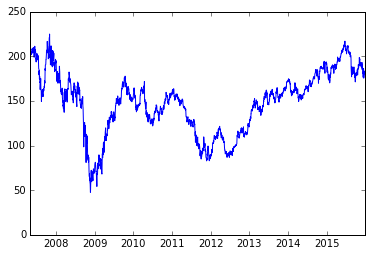

In [123]:
plt.plot(data.Close)

In [161]:
def run(x0=(200.,0.), P=50, R=100, Q=0, dt=1.0, data=None,
        count=0, do_plot=True, **kwargs):
    """
    `data` is a 2D numpy array; the first column contains
    the actual position, the second contains the measurements
    """

    # Simulate dog if no data provided. This is handy because
    # it ensures that the noise in the dog simulation and the
    # kalman filter are the same. 
    #if data is None:
     #   data = compute_dog_data(R, Q, count)

    # create the Kalman filter
    kf = pos_vel_filter(x0, R=R, P=P, Q=Q, dt=dt)  

    # run the kalman filter and store the results
    xs, cov = [], []
    for n in range(data.shape[0]):
        row = data.iloc[n]
        z = row['Close']
        #z=np.array([z])
        R = (float(row['High'])-float(row['Low']))*2
        kf.predict( )
        xs.append(kf.x)
        cov.append(kf.P)
        
        kf.update(z, R =R)
        #print(z)
        
        
        
    xs, cov = np.array(xs), np.array(cov)
    #if do_plot:
     #   plot_track(xs[:, 0], data[:, 0], data[:, 1], cov, 
      #             dt=dt, **kwargs)
    return xs, cov

In [157]:
from filterpy.stats import plot_covariance_ellipse


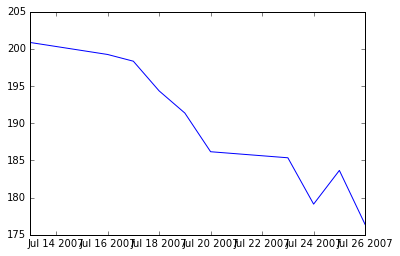

In [160]:
plot(data.Close[50:60])

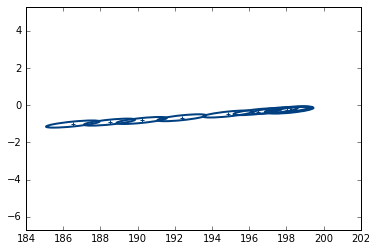

In [159]:
for i in range(50, 60):
    plot_covariance_ellipse(xs[i], cov[i])

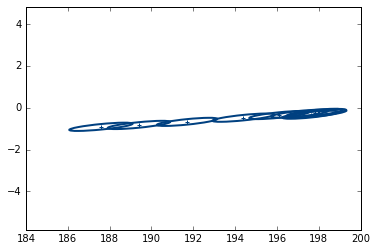

In [164]:
for i in range(50, 60):
    plot_covariance_ellipse(xs[i], cov[i])

In [162]:
xs, cov = run(P=5, R=0, Q=Q, data=data)

[[ 18.940877]]
[[ 0.52800485]
 [ 0.26407172]]
[[ 19.88550216]]
[[ 0.66005485]
 [ 0.30400193]]
[[ 22.24134988]]
[[ 0.46855717]
 [ 0.17558351]]
[[ 19.45622201]]
[[ 0.55798325]
 [ 0.16670114]]
[[ 14.35581707]]
[[ 0.57787175]
 [ 0.14380427]]
[[ 14.24133446]]
[[ 0.39191274]
 [ 0.08488542]]
[[ 13.16160031]]
[[ 0.38761261]
 [ 0.07395891]]
[[ 12.38531229]]
[[ 0.36214818]
 [ 0.06184162]]
[[ 11.26313116]]
[[ 0.35186869]
 [ 0.05455866]]
[[ 11.60025779]]
[[ 0.29829025]
 [ 0.04260285]]
[[ 10.07916546]]
[[ 0.31740321]
 [ 0.04218205]]
[[ 8.18721038]]
[[ 0.34532206]
 [ 0.04325657]]
[[ 8.90588224]]
[[ 0.26565299]
 [ 0.03188603]]
[[ 8.4601392]]
[[ 0.26005851]
 [ 0.03015301]]
[[ 7.86698932]]
[[ 0.26019882]
 [ 0.02937971]]
[[ 9.8545678]]
[[ 0.19225052]
 [ 0.02131716]]
[[ 13.30691071]]
[[ 0.14330274]
 [ 0.01561506]]
[[ 7.54714707]]
[[ 0.26859912]
 [ 0.02866913]]
[[ 7.57394145]]
[[ 0.24213964]
 [ 0.02560208]]
[[ 14.51709442]]
[[ 0.11828169]
 [ 0.01247816]]
[[ 9.62801028]]
[[ 0.19401727]
 [ 0.02026907]]
[[ 8

In [144]:
xs

array([[  1.99163063e+02,  -4.18578502e-01],
       [  1.99762062e+02,   5.00878417e-02],
       [  2.02482458e+02,   1.05073873e+00],
       ..., 
       [  1.80720064e+02,  -2.23389231e-01],
       [  1.80859122e+02,  -1.81214343e-01],
       [  1.80609768e+02,  -1.89410632e-01]])

In [126]:
cov

array([[[ 4.72036445,  2.36080172],
        [ 2.36080172,  3.68267927]],

       [[ 4.46195759,  2.05504695],
        [ 2.05504695,  1.84841739]],

       [[ 5.53834852,  2.07539818],
        [ 2.07539818,  1.16622614]],

       ..., 
       [[ 0.84682577,  0.09465958],
        [ 0.09465958,  0.0274541 ]],

       [[ 0.80952745,  0.09419774],
        [ 0.09419774,  0.02750213]],

       [[ 0.87017125,  0.10466971],
        [ 0.10466971,  0.02874313]]])

In [137]:
preds = xs[:,0]+xs[:,1]

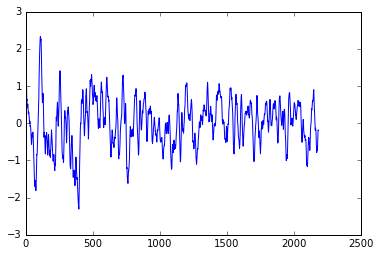

In [127]:
plt.plot(xs[:,1])

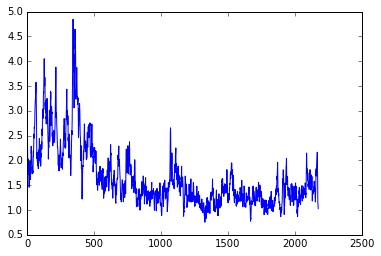

In [167]:
plot(cov[:,0][:,0][10:])

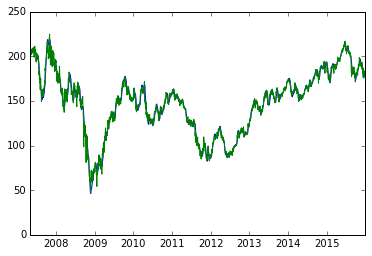

In [138]:
data['Filterdddddd'] = preds
plt.plot(data['Filterdddddd'])#[-50:])#.shift(-1))
plt.plot(data.Close)#[-50:])

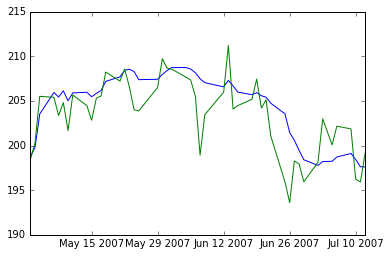

In [139]:
plt.plot(data['Filterdddddd'][:50])
plt.plot(data.Close[:50])

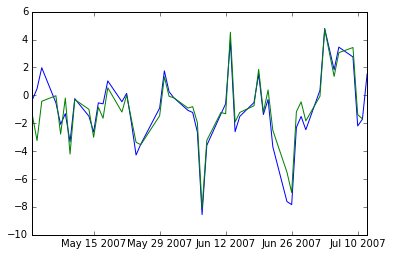

In [140]:
plt.plot(data.Close[:50]-data['Filterdddddd'][:50])
plt.plot(data.Close[:50]-data['Filterdddddd'][:50].shift(-1))

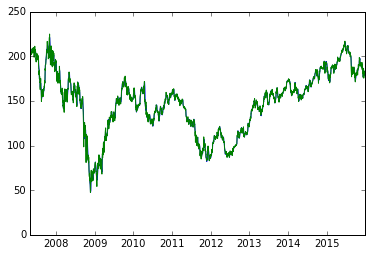

In [68]:
data['Filterdddddd'] = xs[:,0]
plt.plot(data['Filterdddddd'])
plt.plot(data.Close)

In [ ]:
kf = KalmanFilter(dim_x=2, dim_z=1)

In [ ]:
kf.P *=5

In [ ]:
kf.P

In [ ]:
?KalmanFilter

In [ ]:
from numpy import *
from numpy.random import *


def resample(weights):
    n = len(weights)
    indices = []
    C = [0.] + [sum(weights[:i+1]) for i in range(n)]
    u0, j = random(), 0
    for u in [(u0+i)/n for i in range(n)]:
        while u > C[j]:
            j+=1
        indices.append(j-1)
    return indices


def particlefilter(sequence, pos, stepsize, n):
    seq = iter(sequence)
    x = ones((n, 2), int) * pos                   # Initial position
    f0 = seq.next()[tuple(pos)] * ones(n)         # Target colour model
    yield pos, x, ones(n)/n                       # Return expected position, particles and weights
    for im in seq:
        x += uniform(-stepsize, stepsize, x.shape)  # Particle motion model: uniform step
        x  = x.clip(zeros(2), array(im.shape)-1).astype(int) # Clip out-of-bounds particles
        f  = im[tuple(x.T)]                         # Measure particle colours
        w  = 1./(1. + (f0-f)**2)                    # Weight~ inverse quadratic colour distance
        w /= sum(w)                                 # Normalize w
        yield sum(x.T*w, axis=1), x, w              # Return expected position, particles and weights
        if 1./sum(w**2) < n/2.:                     # If particle cloud degenerate:
            x  = x[resample(w),:]                     # Resample particles according to weights

In [ ]:
from pylab import *
#from itertools import zip
import time
ion()
seq = [ im for im in zeros((20,240,320), int)]      # Create an image sequence of 20 frames long
x0 = array([120, 160])                              # Add a square with starting position x0 moving along trajectory xs
xs = vstack((arange(20)*3, arange(20)*2)).T + x0
for t, x in enumerate(xs):
    xslice = slice(x[0]-8, x[0]+8)
    yslice = slice(x[1]-8, x[1]+8)
    seq[t][xslice, yslice] = 255

for im, p in zip(seq, particlefilter(seq, x0, 8, 100)): # Track the square through the sequence
    pos, xs, ws = p
    position_overlay = zeros_like(im)
    position_overlay[tuple(pos)] = 1
    particle_overlay = zeros_like(im)
    particle_overlay[tuple(xs.T)] = 1
    hold(True)
    draw()
    time.sleep(0.3)
    clf()                                           # Causes flickering, but without the spy plots aren't overwritten
    imshow(im,cmap=cm.gray)                         # Plot the image
    spy(position_overlay, marker='.', color='b')    # Plot the expected position
    spy(particle_overlay, marker=',', color='r')    # Plot the particles
    show()

In [ ]:
def create_uniform_particles(x_range, hdg_range, N):
    particles = np.empty((N, 3))
    particles[:, 0] = uniform(x_range[0], x_range[1], size=N)
    particles[:, 1] = uniform(hdg_range[0], hdg_range[1], size=N)
    particles[:, 1] %= 2 * np.pi
    return particles

def create_gaussian_particles(mean, std, N):
    particles = np.empty((N, 3))
    particles[:, 0] = mean[0] + (randn(N) * std[0])
    particles[:, 1] = mean[1] + (randn(N) * std[1])
    particles[:, 2] = mean[2] + (randn(N) * std[2])
    particles[:, 2] %= 2 * np.pi
    return particles


def predict(particles, u, std, dt=1.):
    """ move according to control input u (heading change, velocity)
    with noise Q (std heading change, std velocity)`"""

    N = len(particles)
    # update heading
    particles[:, 1] += u[0] + (randn(N) * std[0])
    particles[:, 1] %= 2 * np.pi

    # move in the (noisy) commanded direction
    dist = (u[1] * dt) + (randn(N) * std[1])
    particles[:, 0] += particles[:, 1] * dist

def update(particles, weights, z, R, landmarks):
    weights.fill(1.)
    for i, landmark in enumerate(landmarks):
        distance = np.linalg.norm(particles[:, 0:1] - landmark, axis=1)
        weights *= scipy.stats.norm(distance, R).pdf(z[i])

    weights += 1.e-300      # avoid round-off to zero
    weights /= sum(weights) # normalize
    
def estimate(particles, weights):
    """returns mean and variance of the weighted particles"""

    pos = particles[:, 0:2]
    mean = np.average(pos, weights=weights, axis=0)
    var  = np.average((pos - mean)**2, weights=weights, axis=0)
    return mean, var


In [ ]:
sys.path.append('tradetest/scrape_tickerdata_[p1]/')

In [ ]:
import particle_filter as pf

In [ ]:
imp.reload(pf)